In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display


An arbitrary Jones vector is given by

\begin{pmatrix}
E_x\\
E_y e^{i\delta}
\end{pmatrix}

where $\delta$ is the relative phase between the...

A QWP with angle $\theta$ w.r.t to the horizontal axis is

$$
e^{-i\pi/4}
\begin{pmatrix}
\cos^2\theta+i\sin^2\theta & (1-i)\sin\theta\cos\theta\\
(1-i)\cos\theta\sin\theta & \sin^2\theta + i\cos^2\theta
\end{pmatrix}
$$

A HWP with angle $\theta$ w.r.t to the horizontal axis is

$$
e^{-i\pi/2}
\begin{pmatrix}
\cos^2\theta-\sin^2\theta & 2\sin\theta\cos\theta\\
2\cos\theta\sin\theta & \sin^2\theta - \cos^2\theta
\end{pmatrix}
$$


In [476]:
x,theta,phi,delta,Ex,Ey = symbols('x,theta,phi,delta,E_x,E_y', real=True)

def QWP(x):
    return exp(-I*pi/4)*Matrix([[cos(x)**2+I*sin(x)**2, (1-I)*sin(x)*cos(x)],[(1-I)*sin(x)*cos(x), sin(x)**2+I*cos(x)**2]])

def HWP(x):
    return exp(-I*pi/2)*Matrix([[cos(x)**2-sin(x)**2, 2*sin(x)*cos(x)],[2*sin(x)*cos(x), sin(x)**2-cos(x)**2]])

vec = simplify(HWP(phi)@QWP(0)@Matrix([1, exp(I*delta)]))
# vec = simplify(HWP(phi)@QWP(theta)@Matrix([1, -I]))

In [477]:
a = QWP(theta)@Matrix([Ex,Ey*exp(I*delta)])
a = simplify(a/-I)
# simplify(a/a[0])
a

Matrix([
[(-1)**(1/4)*(E_x*(I*sin(theta)**2 + cos(theta)**2) + E_y*(1 - I)*exp(I*delta)*sin(2*theta)/2)],
[(-1)**(1/4)*(E_x*(1 - I)*sin(2*theta)/2 + E_y*(sin(theta)**2 + I*cos(theta)**2)*exp(I*delta))]])

In [478]:
QWP(0)@Matrix([1,I])

Matrix([
[ exp(-I*pi/4)],
[-exp(-I*pi/4)]])

In [479]:
(QWP(1)@Matrix([1,1*exp(I*1)])).evalf()

Matrix([
[ 1.24814769720658 - 0.053138127002995*I],
[0.629662886804667 - 0.206950028744475*I]])

In [481]:
f = lambdify((theta,delta), a.subs([(Ex,1), (Ey,1)]))

def angle(theta, delta):
    vec = f(theta, delta)
    return (np.angle(vec[1]) - np.angle(vec[0]))[0]
    
angle(1,np.pi*3/2)

-3.141592653589793

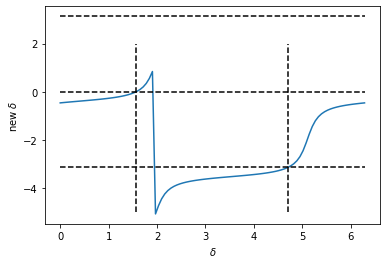

In [469]:
n_theta = 1
n_deltas = np.linspace(0.001, 2*np.pi, 100)

n_angles1 = [angle(0, n_delta) for n_delta in n_deltas]
n_angles2 = [angle(1, n_delta) for n_delta in n_deltas]



fig, ax = plt.subplots()

# ax.plot(n_deltas, n_angles1)
ax.plot(n_deltas, n_angles2)
ax.set_xlabel('$\delta$')
ax.set_ylabel('new $\delta$')

ax.hlines([0,-np.pi,np.pi],0,2*np.pi, linestyle='dashed', color='k')
ax.vlines([np.pi/2,3*np.pi/2],-5,2, linestyle='dashed', color='k')

plt.show()

In [182]:
a = HWP(pi/4)@Matrix([1,exp(I*pi/3)])
simplify(expand(a/a[0]))

Matrix([
[           1],
[exp(-I*pi/3)]])

In [159]:
simplify(expand(im(vec[0])/re(vec[0])))

(sqrt(2)*sin(delta - 2*phi + pi/4) - sqrt(2)*sin(delta + 2*phi + pi/4) - 2*cos(2*phi))/(-2*cos(2*phi) + sqrt(2)*cos(delta - 2*phi + pi/4) - sqrt(2)*cos(delta + 2*phi + pi/4))

In [160]:
simplify(expand(im(vec[1])/re(vec[1])))

(sin(delta)*cos(2*phi) + sin(2*phi) - cos(delta)*cos(2*phi))/(sin(delta)*cos(2*phi) + sin(2*phi) + cos(delta)*cos(2*phi))

In [150]:
h = simplify(vec.subs([(theta,0), (phi,pi/3)]))
h

Matrix([
[(-1)**(1/4)*(-sqrt(3)*I*exp(I*delta) + 1)/2],
[  (-1)**(1/4)*(-I*exp(I*delta) - sqrt(3))/2]])

In [143]:
t = simplify(im(vec[0])/re(vec[0]))

In [144]:
b = simplify(im(vec[1])/re(vec[1]))

In [146]:
simplify(t/b)

-(-sqrt(2)*sin(delta - 2*phi + pi/4) + sqrt(2)*sin(delta + 2*phi + pi/4) + 2*cos(2*phi) + cos(delta - 2*phi) - cos(delta + 2*phi) - cos(delta - 2*phi + 2*theta) + cos(delta + 2*phi - 2*theta))*(2*sin(2*phi - 2*theta) + sqrt(2)*sin(delta - 2*phi + pi/4) + sqrt(2)*sin(delta + 2*phi + pi/4) - cos(delta - 2*phi) - cos(delta + 2*phi) + cos(delta - 2*phi + 2*theta) + cos(delta + 2*phi - 2*theta))/((-2*sin(2*phi) + sin(delta - 2*phi) + sin(delta + 2*phi) - sin(delta - 2*phi + 2*theta) - sin(delta + 2*phi - 2*theta) + sqrt(2)*cos(delta - 2*phi + pi/4) + sqrt(2)*cos(delta + 2*phi + pi/4))*(-sin(delta - 2*phi) + sin(delta + 2*phi) + sin(delta - 2*phi + 2*theta) - sin(delta + 2*phi - 2*theta) + 2*cos(2*phi - 2*theta) - sqrt(2)*cos(delta - 2*phi + pi/4) + sqrt(2)*cos(delta + 2*phi + pi/4)))

In [118]:
h = expand_complex(h)
h = h.rewrite(exp).simplify()
h

Matrix([
[ (1 - I)*(sqrt(2)*I*exp(I*phi_x) + sqrt(6)*exp(I*phi_y))/4],
[(1 - I)*(-sqrt(6)*I*exp(I*phi_x) + sqrt(2)*exp(I*phi_y))/4]])

In [111]:
expand(h[0])

-sqrt(2)*I*exp(2*I*phi)*exp(I*phi_x)/4 - sqrt(2)*exp(2*I*phi)*exp(I*phi_x)*exp(-2*I*theta)/4 - sqrt(2)*exp(2*I*phi)*exp(I*phi_y)/4 - sqrt(2)*I*exp(2*I*phi)*exp(I*phi_y)*exp(-2*I*theta)/4 - sqrt(2)*exp(-2*I*phi)*exp(I*phi_x)*exp(2*I*theta)/4 - sqrt(2)*I*exp(-2*I*phi)*exp(I*phi_x)/4 + sqrt(2)*I*exp(-2*I*phi)*exp(I*phi_y)*exp(2*I*theta)/4 + sqrt(2)*exp(-2*I*phi)*exp(I*phi_y)/4

In [112]:
expand(h[1]*I)

-sqrt(2)*I*exp(2*I*phi)*exp(I*phi_x)/4 - sqrt(2)*exp(2*I*phi)*exp(I*phi_x)*exp(-2*I*theta)/4 - sqrt(2)*exp(2*I*phi)*exp(I*phi_y)/4 - sqrt(2)*I*exp(2*I*phi)*exp(I*phi_y)*exp(-2*I*theta)/4 + sqrt(2)*exp(-2*I*phi)*exp(I*phi_x)*exp(2*I*theta)/4 + sqrt(2)*I*exp(-2*I*phi)*exp(I*phi_x)/4 - sqrt(2)*I*exp(-2*I*phi)*exp(I*phi_y)*exp(2*I*theta)/4 - sqrt(2)*exp(-2*I*phi)*exp(I*phi_y)/4

## Doing everything numerically bc symbolically is really messy

In [2]:
def LP(theta):
    '''
    Jones matrix for a linear polarization with angle theta wrt horizontal
    '''
    return np.array([[np.cos(theta)**2, np.cos(theta)*np.sin(theta)],
                     [np.cos(theta)*np.sin(theta), np.sin(theta)**2]])

def HWP(theta):
    '''
    Jones matrix for a half wave plate with angle theta wrt horizontal
    '''
    return np.exp(-1j*np.pi/2)*np.array([[np.cos(theta)**2-np.sin(theta)**2, 2*np.cos(theta)*np.sin(theta)],
                                        [2*np.cos(theta)*np.sin(theta), np.sin(theta)**2 - np.cos(theta)**2]])

def QWP(theta):
    '''
    Jones matrix for a quarter wave plate with angle theta wrt horizontal
    '''
    return np.exp(-1j*np.pi/4)*np.array([[np.cos(theta)**2+1j*np.sin(theta)**2, (1-1j)*np.cos(theta)*np.sin(theta)],
                                        [(1-1j)*np.cos(theta)*np.sin(theta), np.sin(theta)**2+1j*np.cos(theta)**2]])

In [3]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(int(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

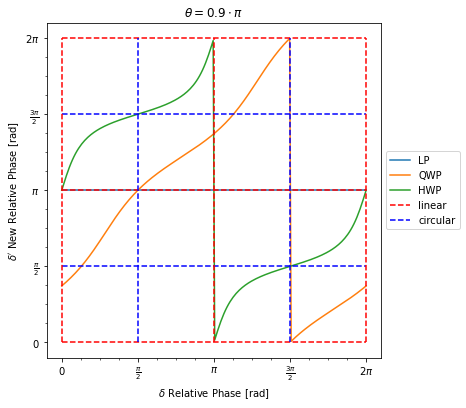

In [9]:
# delta is the relative phase between the horizontal and vertical components of the Jones vector
delta = np.linspace(0, 2*np.pi, 200)

linear = []
half = []
quarter = []

n = .9
theta = n*np.pi

for d in delta:
    # Jones vector
    vec = np.array([1, np.exp(1j*d)])
    
    vec_LP = LP(theta)@vec
    angles_LP = np.angle(vec_LP)
    linear.append(angles_LP[1]-angles_LP[0])
    
    vec_HWP = HWP(theta)@vec
    angles_HWP = np.angle(vec_HWP)
    half.append(angles_HWP[1]-angles_HWP[0])
    
    vec_QWP = QWP(theta)@vec
    angles_QWP = np.angle(vec_QWP)
    quarter.append(angles_QWP[1]-angles_QWP[0])
    
    
linear = np.mod(np.round(linear,10), 2*np.pi)
half = np.mod(half, 2*np.pi)
quarter = np.mod(quarter, 2*np.pi)

    
fig, ax = plt.subplots(figsize=(6,8))

ax.plot(delta, linear, label='LP')
ax.plot(delta, quarter, label='QWP')
ax.plot(delta, half, label='HWP')

ax.set_title(fr'$\theta={n}\cdot\pi$')

ax.hlines([0,np.pi,2*np.pi],0,2*np.pi, linestyle='dashed', color='r', label='linear')
ax.hlines([np.pi/2,3*np.pi/2],0,2*np.pi, linestyle='dashed', color='b', label='circular')
ax.vlines([0,np.pi,2*np.pi],0,2*np.pi, linestyle='dashed', color='r')
ax.vlines([np.pi/2,3*np.pi/2],0,2*np.pi, linestyle='dashed', color='b')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('$\delta$ Relative Phase [rad]')
ax.set_ylabel("$\delta'$ New Relative Phase [rad]")

ax.set_aspect(1.0)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

plt.show()

In [39]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

lin, = ax.plot(delta, np.zeros(len(delta)), label='LP')
qtr, = ax.plot(delta, np.zeros(len(delta)), label='QWP')
hlf, = ax.plot(delta, np.zeros(len(delta)), label='HWP')

patches = [lin, qtr, hlf]

ax.set_title(fr'$\theta=$NaN')

ax.hlines([0,np.pi,2*np.pi],0,2*np.pi, linestyle='dashed', color='r', label='linear')
ax.hlines([np.pi/2,3*np.pi/2],0,2*np.pi, linestyle='dashed', color='b', label='circular')
ax.vlines([0,np.pi,2*np.pi],0,2*np.pi, linestyle='dashed', color='r')
ax.vlines([np.pi/2,3*np.pi/2],0,2*np.pi, linestyle='dashed', color='b')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('$\delta$ Relative Phase [rad]')
ax.set_ylabel("$\delta'$ New Relative Phase [rad]")

ax.set_aspect(1.0)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

print('Frame: 0', end='')

N = 401
n = np.linspace(0, 2, N)
def animate(i):
    theta = n[i]*np.pi
 
    linear = []
    half = []
    quarter = []

    for d in delta:
        # Jones vector
        vec = np.array([1, np.exp(1j*d)])

        vec_LP = LP(theta)@vec
        angles_LP = np.angle(vec_LP)
        linear.append(angles_LP[1]-angles_LP[0])

        vec_HWP = HWP(theta)@vec
        angles_HWP = np.angle(vec_HWP)
        half.append(angles_HWP[1]-angles_HWP[0])

        vec_QWP = QWP(theta)@vec
        angles_QWP = np.angle(vec_QWP)
        quarter.append(angles_QWP[1]-angles_QWP[0])
    
    linear = np.mod(np.round(linear,10), 2*np.pi)
    half = np.mod(half, 2*np.pi)
    quarter = np.mod(quarter, 2*np.pi)
    
    lin.set_ydata(linear)
    qtr.set_ydata(quarter)
    hlf.set_ydata(half)
    ax.set_title(fr'Polarizer angle $\theta={np.round(n[i],2):.2f}\cdot\pi$ [rad]')
    
    print(f'\rFrame: {i+1}', end='', flush=True)
    return patches

anim = animation.FuncAnimation(fig,animate,frames=N,interval=50)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()    

Frame: 401